<a href="https://colab.research.google.com/github/And2300/Trash/blob/main/plots_C3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
pip install --user fonttools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 944 kB 27.1 MB/s 
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [ ]:
from matplotlib import rcParams, cycler
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
import matplotlib

rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
rcParams['font.size'] = 16
rcParams['axes.linewidth'] = 1.1
rcParams['axes.labelpad'] = 10.0
plot_color_cycle = cycler('color', ['000000', '0000FE', 'FE0000', '008001', 'FD8000', '8c564b', 
                                    'e377c2', '7f7f7f', 'bcbd22', '17becf'])
rcParams['axes.prop_cycle'] = plot_color_cycle
rcParams['axes.xmargin'] = 0
rcParams['axes.ymargin'] = 0
rcParams.update({"figure.figsize" : (12,5), #(6.8,4.8)  (12.8,4.8)
                 "figure.subplot.left" : 0.177, "figure.subplot.right" : 0.946,
                 "figure.subplot.bottom" : 0.156, "figure.subplot.top" : 0.965,
                 "axes.autolimit_mode" : "round_numbers",
                 "xtick.major.size"     : 7,#7
                 "xtick.minor.size"     : 3.5,#3.5
                 "xtick.major.width"    : 1.1,
                 "xtick.minor.width"    : 1.1,
                 "xtick.major.pad"      : 5,
                 'xtick.labelsize'      : 12, #taamaño X
                 "xtick.minor.visible" : True,
                 "ytick.major.size"     : 7,
                 "ytick.minor.size"     : 3.5,
                 "ytick.major.width"    : 1.1,
                 "ytick.minor.width"    : 1.1,
                 "ytick.major.pad"      : 5,
                 "ytick.minor.visible" : True,
                 "lines.markersize" : 10,
                 "lines.markerfacecolor" : "none",
                 "lines.markeredgewidth"  : 0.8})

# primer plot

In [ ]:
datContent = np.array([np.array(i.strip().split()) for i in open("solverInfo.dat").readlines()],dtype=object)
#hay que eliminar solver information
# hay que juntar # y Time en #Time

In [ ]:
df = pd.DataFrame(datContent)
df.columns=df.loc[0]
df = df.iloc[1:].reset_index(drop=True)

In [ ]:
df.head()

,#Time,U_solver,Ux_initial,Ux_final,Ux_iters,Uy_initial,Uy_final,Uy_iters,Uz_initial,Uz_final,Uz_iters,U_converged,p_solver,p_initial,p_final,p_iters,p_converged
0,1,smoothSolver,1.000000e+00,2.224620e-02,2,1.000000e+00,2.224620e-02,2,4.112100e-05,8.973510e-07,2,false,GAMG,1.000000e+00,5.253330e-02,18,true
1,2,smoothSolver,5.609730e-01,4.025180e-02,2,5.444070e-01,3.690850e-02,2,8.167630e-01,7.515240e-02,1,false,GAMG,3.037070e-02,1.551180e-03,2,true
2,3,smoothSolver,2.402980e-01,1.834810e-02,2,2.328470e-01,1.680020e-02,2,5.218560e-01,1.505210e-02,2,false,GAMG,2.522630e-02,2.054050e-03,4,true
3,4,smoothSolver,6.569380e-02,4.639060e-03,2,5.539010e-02,3.997870e-03,2,2.857740e-01,1.083490e-02,2,false,GAMG,3.494970e-02,2.159800e-03,6,true
4,5,smoothSolver,1.264100e-01,7.847760e-03,2,1.314610e-01,7.806570e-03,2,2.214150e-01,6.345170e-03,2,false,GAMG,1.875760e-01,1.311330e-02,2,true


In [ ]:
df.columns

Index(['#Time', 'U_solver', 'Ux_initial', 'Ux_final', 'Ux_iters', 'Uy_initial',
       'Uy_final', 'Uy_iters', 'Uz_initial', 'Uz_final', 'Uz_iters',
       'U_converged', 'p_solver', 'p_initial', 'p_final', 'p_iters',
       'p_converged'],
      dtype='object', name=0)

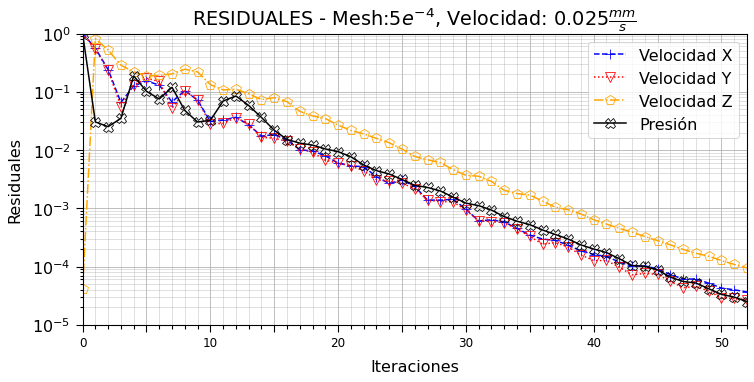

In [ ]:
fig = plt.figure(figsize=(12, 5))
ax = plt.gca()
major_ticks = np.arange(0, 100, 5)    
minor_ticks = np.arange(0, 100, 1)
ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)
ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)
ax.grid(which='major')
ax.grid(which='minor', alpha=0.5)
#ax.set_aspect('equal')

xticks = ax.get_xticks().tolist()
for i in range(1, len(xticks), 2):
    xticks[i] = ''
ax.set_xticklabels(xticks)

yticks = ax.get_yticks().tolist()
for i in range(1, len(yticks), 2):
    yticks[i] = ''
ax.set_yticklabels(yticks)

#plots
ax.plot(df['Ux_initial'].astype(float), label="Velocidad X", color='blue', marker='+',linestyle='dashed')
ax.plot(df['Uy_initial'].astype(float), label="Velocidad Y", color='red', marker='v',linestyle='dotted')
ax.plot(df['Uz_initial'].astype(float), label="Velocidad Z", color='orange', marker='p',linestyle='dashdot')
ax.plot(df['p_initial'].astype(float), label="Presión", color='k', marker='X',linestyle='solid')

ax.set_title(r'RESIDUALES - Mesh:$5e^{-4}$, Velocidad: $0.025 \frac{mm}{s}$')
ax.set_xlabel(r'Iteraciones')
ax.set_ylabel(r'Residuales')

ax.legend(loc='upper right')
ax.set_yscale('log')

fig.savefig("chao_res_5e4_0025.png", dpi=500,bbox_inches='tight')

plt.show()

# segundo plot

In [ ]:
df = pd.read_excel('datos_cao.xlsx')

In [ ]:
df

,indices,stdR,stdG,stdB
0,1,94.473419,71.904957,4.692155
1,2,76.427192,56.001902,3.081949
2,3,58.924247,41.978416,1.554206
3,4,43.983770,27.576066,0.974891
4,5,35.803400,23.187922,1.169588
5,6,28.931188,23.541905,1.290380
6,7,23.712077,18.131393,0.892900
7,8,18.282532,8.871044,1.389873
8,9,21.263678,12.427295,1.000857
9,10,14.701744,9.559704,2.480003


In [ ]:
df.columns

Index(['indices', 'stdR', 'stdG', 'stdB'], dtype='object')



```
# Esto tiene formato de código
k=5.8645
for i in range(11):
  k = k +9.385
  print(k)

15.2495
24.6345
34.0195
43.4045
52.7895
62.174499999999995
71.5595
80.9445
90.32950000000001
99.71450000000002
109.09950000000002
```



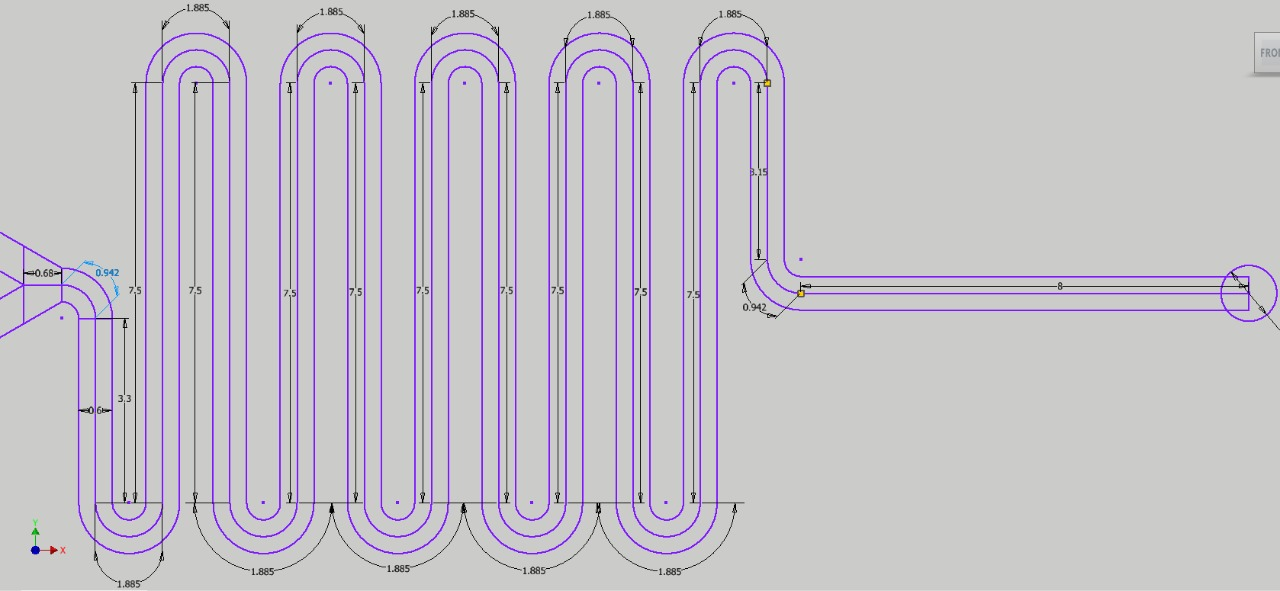

In [ ]:
newindces = [0, 5.8645, 15.2495, 24.6345, 34.0195, 43.4045, 52.7895, 
             62.1745, 71.5595, 80.9445, 90.3295, 95.364+3.5]  #9.385

In [ ]:
df['new_indices']=newindces

In [ ]:
df

,indices,stdR,stdG,stdB,new_indices
0,1,94.473419,71.904957,4.692155,0.0000
1,2,76.427192,56.001902,3.081949,5.8645
2,3,58.924247,41.978416,1.554206,15.2495
3,4,43.983770,27.576066,0.974891,24.6345
4,5,35.803400,23.187922,1.169588,34.0195
5,6,28.931188,23.541905,1.290380,43.4045
6,7,23.712077,18.131393,0.892900,52.7895
7,8,18.282532,8.871044,1.389873,62.1745
8,9,21.263678,12.427295,1.000857,71.5595
9,10,14.701744,9.559704,2.480003,80.9445


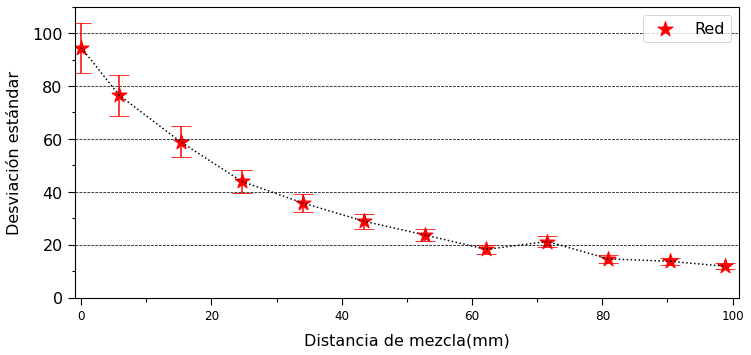

In [ ]:
plt.scatter(df['new_indices'],df['stdR'], label="Red", color='red', marker='*', s=250)
plt.errorbar(df['new_indices'],df['stdR'], yerr = df['stdR']*0.1 , linestyle=":",  capsize=10,  ecolor="red") #[df['stdR']*0.1,df['stdR']*0.2]

plt.scatter(df['new_indices'],df['stdG'], label="Green", color='green', marker='v', s=250)
plt.errorbar(df['new_indices'],df['stdG'], yerr = df['stdG']*0.1 , linestyle=":",  capsize=10,  ecolor="green") #[df['stdG']*0.1,df['stdG']*0.2] 

plt.scatter(df['new_indices'],df['stdB'], label="Blue", color='blue', marker='p', s=250)
plt.errorbar(df['new_indices'],df['stdB'], yerr = df['stdB']*0.1, linestyle=":",  capsize=10,  ecolor="blue") #[df['stdB']*0.5,df['stdB']*0.7]


plt.xlim(-1, 101)
plt.ylim(0, 110)
#plt.title('Desviación estándar del valor Rojo en el microcanal caótico')
plt.xlabel(r'Distancia de mezcla(mm)')
plt.ylabel(r'Desviación estándar')
plt.legend(loc='upper right')

#plt.yscale('log')
#plt.text(3, 32, r'$y= 3.959 \pm 0.082 \frac{mm}{s}$', fontsize=15)
#plt.text(1, 33, r'$v_{experimental}= 3.739 \pm 0.393 \frac{mm}{s}$', fontsize=20)
#plt.text(6, 15, r'$\^v_{teórico}= 3.589 \frac{mm}{s}$', fontsize=20)
#plt.annotate('[b]', xy=(0,38),fontsize=30)
plt.grid(axis='y',color = 'k', linestyle = '--', linewidth = 0.75)
plt.gca().xaxis.set_minor_locator(AutoMinorLocator(n=2))
plt.gca().yaxis.set_minor_locator(AutoMinorLocator(n=2))
plt.savefig("chaotic_0075_R.png", dpi=500,bbox_inches='tight')
plt.show()

In [ ]:
df1 = pd.read_excel('datos_sim.xlsx')

In [ ]:
df1['new_indices']=newindces

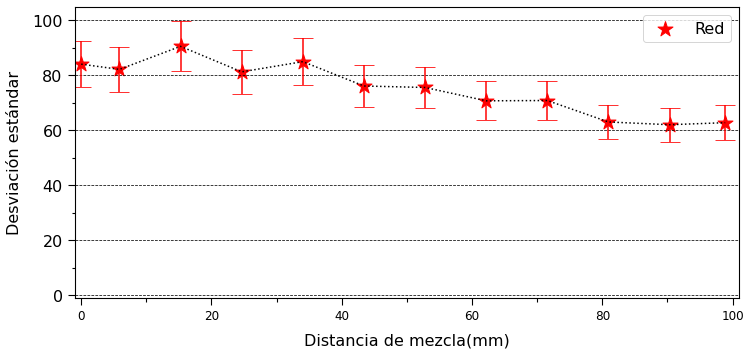

In [ ]:
plt.scatter(df1['new_indices'],df1['stdR'], label="Red", color='red', marker='*', s=250)
plt.errorbar(df1['new_indices'],df1['stdR'], yerr = df1['stdR']*0.1 , linestyle=":",  capsize=10,  ecolor="red") #[df1['stdR']*0.1,df1['stdR']*0.2]

plt.scatter(df1['new_indices'],df1['stdG'], label="Green", color='green', marker='v', s=250)
plt.errorbar(df1['new_indices'],df1['stdG'], yerr = df1['stdG']*0. , linestyle=":",  capsize=10,  ecolor="green") #[df1['stdG']*0.1,df1['stdG']*0.2]

plt.scatter(df1['new_indices'],df1['stdB'], label="Blue", color='blue', marker='p', s=250)
plt.errorbar(df1['new_indices'],df1['stdB'], yerr = df1['stdB']*0.1 , linestyle=":",  capsize=10,  ecolor="blue") #[df1['stdB']*0.5,df1['stdB']*0.7]


plt.xlim(-1, 101)
plt.ylim(-1, 105)
#plt.title('Desviación estándar del valor Rojo en el microcanal simple')
plt.xlabel(r'Distancia de mezcla(mm)')
plt.ylabel(r'Desviación estándar')
plt.legend(loc='upper right')
#plt.text(3, 32, r'$y= 3.959 \pm 0.082 \frac{mm}{s}$', fontsize=15)
#plt.text(1, 33, r'$v_{experimental}= 3.739 \pm 0.393 \frac{mm}{s}$', fontsize=20)
#plt.text(6, 15, r'$\^v_{teórico}= 3.589 \frac{mm}{s}$', fontsize=20)
#plt.annotate('[b]', xy=(0,38),fontsize=30)
plt.grid(axis='y',color = 'k', linestyle = '--', linewidth = 0.75)
plt.gca().xaxis.set_minor_locator(AutoMinorLocator(n=2))
plt.gca().yaxis.set_minor_locator(AutoMinorLocator(n=2))
plt.savefig("simple_0075_R.png", dpi=500,bbox_inches='tight')
plt.show()

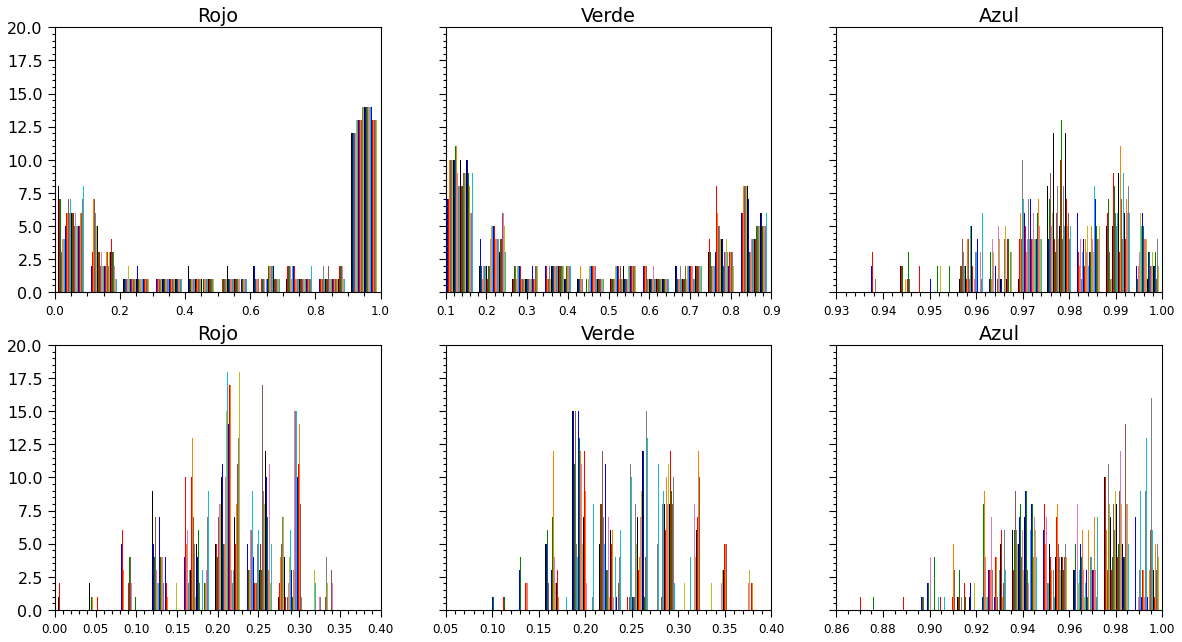

In [ ]:
def im2double(im):
    min_val = np.min(im.ravel())
    max_val = np.max(im.ravel())
    out = (im.astype('float') - min_val) / (max_val - min_val)
    return out

from PIL import Image
from numpy import asarray
# load the image
image = Image.open('4_1_DSC_0040_1.jpg')
data = asarray(image)
data = im2double(data)

image2 = Image.open('4_1_DSC_0040_12.jpg')
data2 = asarray(image2)
data2 = im2double(data2)

fig, axs = plt.subplots(2, 3, figsize=(20, 10), sharey=True)
#fig.suptitle('Entrada')
axs[0][0].hist(data[:,:,0])
axs[0][0].set_title('Rojo')
axs[0][1].hist(data[:,:,1])
axs[0][1].set_title('Verde')
axs[0][2].hist(data[:,:,2])
axs[0][2].set_title('Azul')

#fig.subplots_adjust(top=1.5) 
#fig.suptitle('Salida\n')
axs[1][0].hist(data2[:,:,0])
axs[1][0].set_title('Rojo')
axs[1][1].hist(data2[:,:,1])
axs[1][1].set_title('Verde')
axs[1][2].hist(data2[:,:,2])
axs[1][2].set_title('Azul')

plt.show()

fig.savefig("multi.png", dpi=500,bbox_inches='tight')

# Tercer plot

In [71]:
dfa = pd.read_excel('datos_cao_a.xlsx')
dfb = pd.read_excel('datos_cao_b.xlsx')
dfc = pd.read_excel('datos_cao_c.xlsx')

In [72]:
newindces = [0, 5.8645, 15.2495, 24.6345, 34.0195, 43.4045, 52.7895, 
             62.1745, 71.5595, 80.9445, 90.3295, 95.364+3.5]  #9.385

In [73]:
dfa['new_indices']=newindces
dfb['new_indices']=newindces
dfc['new_indices']=newindces

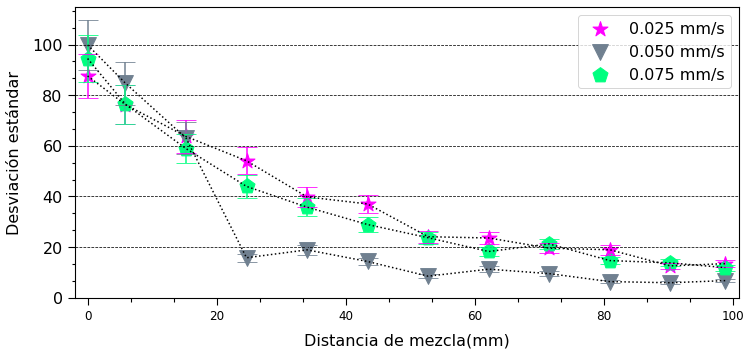

In [88]:
plt.scatter(dfa['new_indices'],dfa['stdR'], label="0.025 mm/s", color='fuchsia', marker='*', s=250)
plt.errorbar(dfa['new_indices'],dfa['stdR'], yerr = dfa['stdR']*0.1 , linestyle=":",  capsize=10,  ecolor="fuchsia") #[df['stdR']*0.1,df['stdR']*0.2]

plt.scatter(dfb['new_indices'],dfb['stdR'], label="0.050 mm/s", color='slategrey', marker='v', s=250)
plt.errorbar(dfb['new_indices'],dfb['stdR'], yerr = dfb['stdR']*0.1 , linestyle=":",  capsize=10,  ecolor="slategrey") #[df['stdG']*0.1,df['stdG']*0.2] 

plt.scatter(dfc['new_indices'],dfc['stdR'], label="0.075 mm/s", color='springgreen', marker='p', s=250)
plt.errorbar(dfc['new_indices'],dfc['stdR'], yerr = dfc['stdR']*0.1, linestyle=":",  capsize=10,  ecolor="springgreen") #[df['stdB']*0.5,df['stdB']*0.7]


plt.xlim(-2, 101)
plt.ylim(0, 115)
#plt.title('Desviación estándar del valor Rojo en el microcanal caótico')
plt.xlabel(r'Distancia de mezcla(mm)')
plt.ylabel(r'Desviación estándar')
plt.legend(loc='upper right')

#plt.yscale('log')
#plt.text(3, 32, r'$y= 3.959 \pm 0.082 \frac{mm}{s}$', fontsize=15)
#plt.text(1, 33, r'$v_{experimental}= 3.739 \pm 0.393 \frac{mm}{s}$', fontsize=20)
#plt.text(6, 15, r'$\^v_{teórico}= 3.589 \frac{mm}{s}$', fontsize=20)
#plt.annotate('[b]', xy=(0,38),fontsize=30)
plt.grid(axis='y',color = 'k', linestyle = '--', linewidth = 0.75)
plt.gca().xaxis.set_minor_locator(AutoMinorLocator(n=3))
plt.gca().yaxis.set_minor_locator(AutoMinorLocator(n=3))
plt.savefig("chaotic_vel.png", dpi=500,bbox_inches='tight')
plt.show()

In [89]:
df1a = pd.read_excel('datos_sim_a.xlsx')
df1b = pd.read_excel('datos_sim_b.xlsx')
df1c = pd.read_excel('datos_sim_c.xlsx')

In [90]:
df1a['new_indices']=newindces
df1b['new_indices']=newindces
df1c['new_indices']=newindces

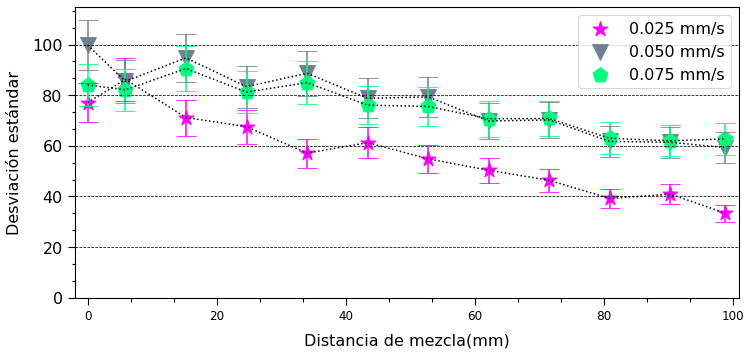

In [92]:
plt.scatter(df1a['new_indices'],df1a['stdR'], label="0.025 mm/s", color='fuchsia', marker='*', s=250)
plt.errorbar(df1a['new_indices'],df1a['stdR'], yerr = df1a['stdR']*0.1 , linestyle=":",  capsize=10,  ecolor="fuchsia") #[df['stdR']*0.1,df['stdR']*0.2]

plt.scatter(df1b['new_indices'],df1b['stdR'], label="0.050 mm/s", color='slategrey', marker='v', s=250)
plt.errorbar(df1b['new_indices'],df1b['stdR'], yerr = df1b['stdR']*0.1 , linestyle=":",  capsize=10,  ecolor="slategrey") #[df['stdG']*0.1,df['stdG']*0.2] 

plt.scatter(df1c['new_indices'],df1c['stdR'], label="0.075 mm/s", color='springgreen', marker='p', s=250)
plt.errorbar(df1c['new_indices'],df1c['stdR'], yerr = df1c['stdR']*0.1, linestyle=":",  capsize=10,  ecolor="springgreen") #[df['stdB']*0.5,df['stdB']*0.7]


plt.xlim(-2, 101)
plt.ylim(0, 115)
#plt.title('Desviación estándar del valor Rojo en el microcanal caótico')
plt.xlabel(r'Distancia de mezcla(mm)')
plt.ylabel(r'Desviación estándar')
plt.legend(loc='upper right')

#plt.yscale('log')
#plt.text(3, 32, r'$y= 3.959 \pm 0.082 \frac{mm}{s}$', fontsize=15)
#plt.text(1, 33, r'$v_{experimental}= 3.739 \pm 0.393 \frac{mm}{s}$', fontsize=20)
#plt.text(6, 15, r'$\^v_{teórico}= 3.589 \frac{mm}{s}$', fontsize=20)
#plt.annotate('[b]', xy=(0,38),fontsize=30)
plt.grid(axis='y',color = 'k', linestyle = '--', linewidth = 0.75)
plt.gca().xaxis.set_minor_locator(AutoMinorLocator(n=3))
plt.gca().yaxis.set_minor_locator(AutoMinorLocator(n=3))
plt.savefig("simple_vel.png", dpi=500,bbox_inches='tight')
plt.show()

## trash 2

In [ ]:
from PIL import Image
from numpy import asarray
# load the image
image = Image.open('4_1_DSC_0040_12.jpg')
# convert image to numpy array
data = asarray(image)
print(type(data))
# summarize shape
print(data.shape)
plt.hist(data[:,:,0]);

Text(0.5, 1.0, 'Blue')

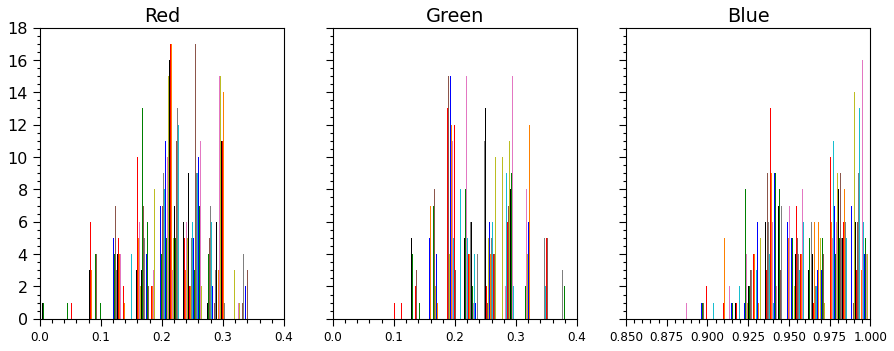

In [ ]:
def im2double(im):
    min_val = np.min(im.ravel())
    max_val = np.max(im.ravel())
    out = (im.astype('float') - min_val) / (max_val - min_val)
    return out

from PIL import Image
from numpy import asarray
# load the image
image = Image.open('4_1_DSC_0040_12.jpg')
# convert image to numpy array
data = asarray(image)
# summarize shape
data = im2double(data)

fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
axs[0].hist(data[:,:,0])
axs[0].set_title('Red')
axs[1].hist(data[:,:,1])
axs[1].set_title('Green')
axs[2].hist(data[:,:,2])
axs[2].set_title('Blue')
#fig.suptitle('Plot hist image')


#plt.hist(data[:,:,0]);

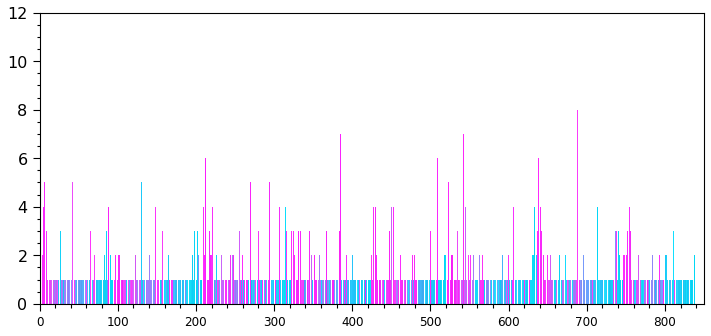

In [ ]:
import PIL
from PIL import Image
from matplotlib import pyplot as plt

im = Image.open('4_1_DSC_0040_1.jpg')  
w, h = im.size  
colors = im.getcolors(w*h)

def hexencode(rgb):
    r=rgb[0]
    g=rgb[1]
    b=rgb[2]
    return '#%02x%02x%02x' % (r,g,b)

for idx, c in enumerate(colors):
    plt.bar(idx, c[0], color=hexencode(c[1]))

plt.xlim(0, 850)
plt.show()

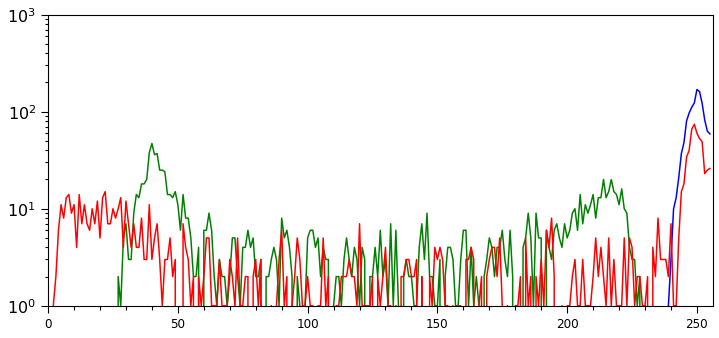

In [ ]:
import cv2
import matplotlib.pyplot as plt
image = cv2.imread('4_1_DSC_0040_1.jpg')
for i, col in enumerate(['b', 'g', 'r']):
    hist = cv2.calcHist([image], [i], None, [256], [0, 256])
    plt.plot(hist, color = col)
    plt.xlim([0, 256])
plt.yscale('log')
plt.show()

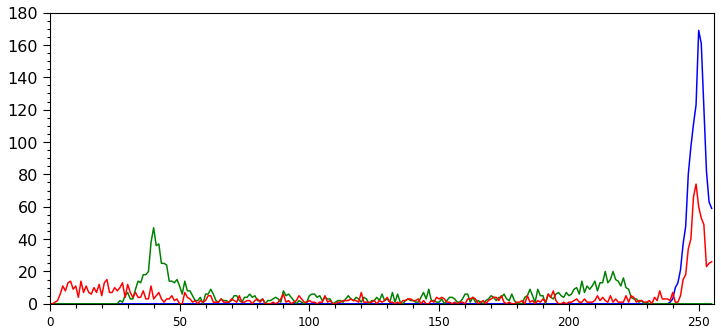

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

file0 = '4_1_DSC_0040_1.jpg'
img = cv2.imread(file0)
color = ('b','g','r')
plt.figure()
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.hist(histr,color = col)
    plt.xlim([0,256])
plt.show()

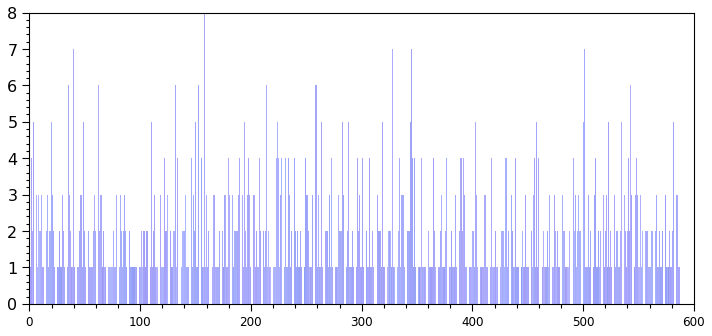

In [ ]:
import PIL
from PIL import Image
from matplotlib import pyplot as plt

im = Image.open('4_1_DSC_0040_12.jpg')  
#im.convertTo(im, CV_64FC3);
w, h = im.size  
colors = im.getcolors(w*h)

def hexencode(rgb):
    r=rgb[0]
    g=rgb[1]
    b=rgb[2]
    return '#%02x%02x%02x' % (r,g,b)

for idx, c in enumerate(colors):
    plt.bar(idx, c[0], color=hexencode(c[1]))

plt.xlim(0, 600)
plt.show()

In [ ]:
import cv2
import numpy as np

def im2double(im):
    min_val = np.min(im.ravel())
    max_val = np.max(im.ravel())
    out = (im.astype('float') - min_val) / (max_val - min_val)
    return out
  
img = cv2.imread('4_1_DSC_0040_12.jpg') # Read in your image
out = im2double(img) # Convert to normalized floating point

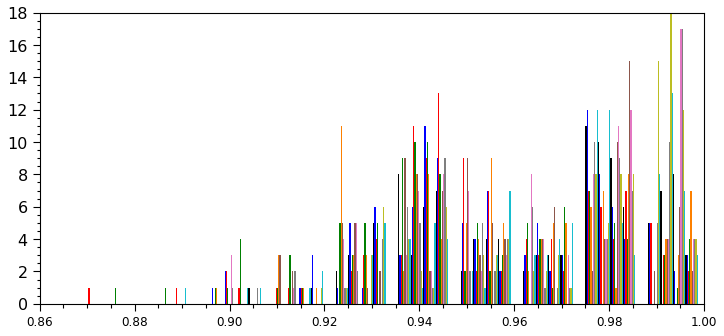

In [ ]:
plt.hist(out[:,:,0]);

In [ ]:
plt.figure()
for i,col in enumerate(color):
    histr = cv2.calcHist([out],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
#plt.yscale('log')   
plt.show()

TypeError: ignored

<Figure size 864x360 with 0 Axes>

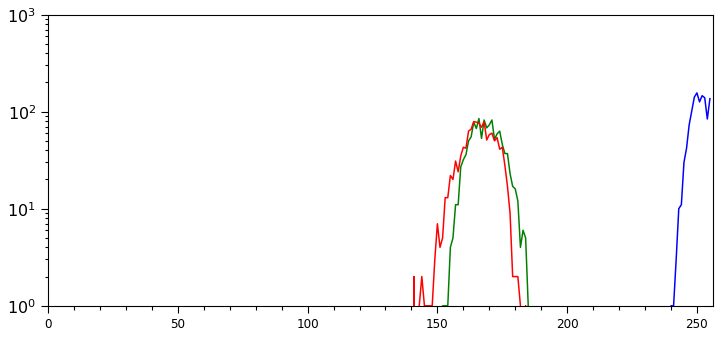

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

file0 = '4_1_DSC_0040_12.jpg'
img = cv2.imread(file0)
color = ('b','g','r')
plt.figure()
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.yscale('log')   
plt.show()

# trash

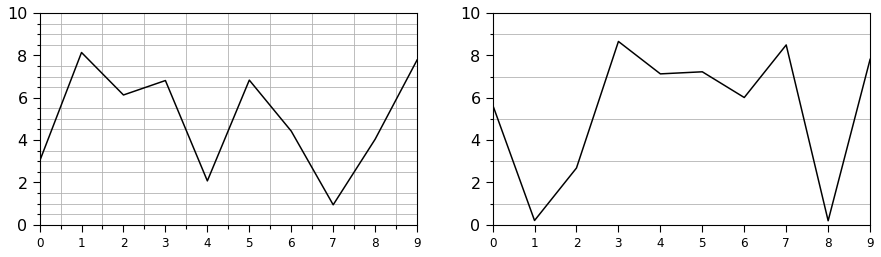

In [ ]:
from matplotlib import pyplot as plt
from matplotlib.ticker import MultipleLocator
import numpy as np

# Two example plots
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)

spacing = 0.5 # This can be your user specified spacing. 
minorLocator = MultipleLocator(spacing)
ax1.plot(9 * np.random.rand(10))
# Set minor tick locations.
ax1.yaxis.set_minor_locator(minorLocator)
ax1.xaxis.set_minor_locator(minorLocator)
# Set grid to use minor tick locations. 
ax1.grid(which = 'minor')

spacing = 1
minorLocator = MultipleLocator(spacing)
ax2.plot(9 * np.random.rand(10))
# Set minor tick locations.
ax2.yaxis.set_minor_locator(minorLocator)
ax2.xaxis.set_minor_locator(minorLocator)
# Set grid to use minor tick locations. 
ax2.grid(which = 'minor')

plt.show()

/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: AutoMinorLocator does not work with logarithmic scale
  fig.canvas.print_figure(bytes_io, **kw)


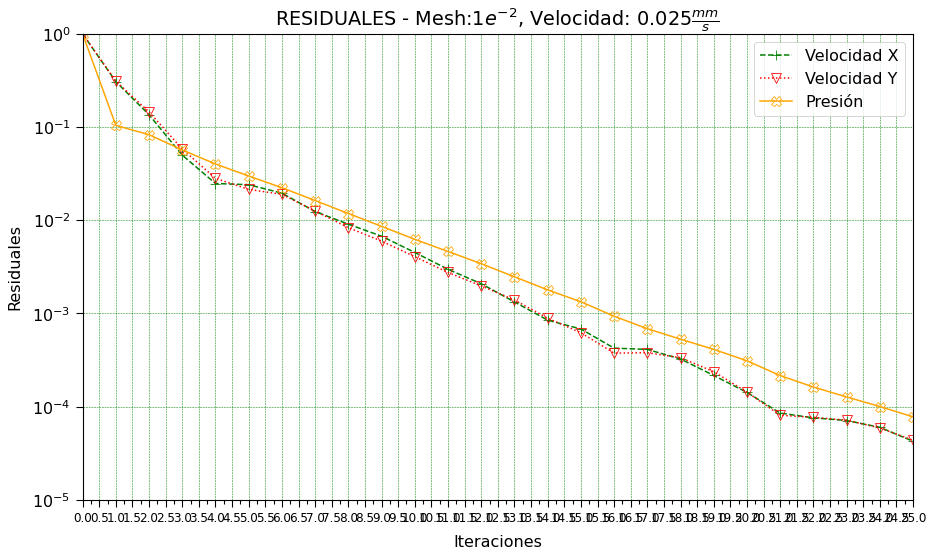

In [ ]:
fig = plt.figure()
ax = fig.gca()
ax.set_xticks(np.arange(0, 26, 0.5))
ax.set_yticks(np.arange(10e0, 10e-5, 5e-1))

plt.plot(df['Ux_initial'].astype(float), label="Velocidad X", color='green', marker='+',linestyle='dashed')
plt.plot(df['Uy_initial'].astype(float), label="Velocidad Y", color='red', marker='v',linestyle='dotted')
#plt.plot(df['Uz_initial'].astype(float), label="Velocidad Z", color='blue', marker='p',linestyle='dashdot')
plt.plot(df['p_initial'].astype(float), label="Presión", color='orange', marker='X',linestyle='solid')
#plt.xlim(0, 13)
#plt.ylim(2.5, None)
plt.title(r'RESIDUALES - Mesh:$1e^{-2}$, Velocidad: $0.025 \frac{mm}{s}$')
plt.xlabel(r'Iteraciones')
plt.ylabel(r'Residuales')
plt.legend(loc='upper right')
#plt.text(3, 32, r'$y= 3.959 \pm 0.082 \frac{mm}{s}$', fontsize=15)
#plt.text(1, 33, r'$v_{experimental}= 3.739 \pm 0.393 \frac{mm}{s}$', fontsize=20)
#plt.text(6, 15, r'$\^v_{teórico}= 3.589 \frac{mm}{s}$', fontsize=20)
#plt.annotate('[b]', xy=(0,38),fontsize=30)
plt.yscale('log')

plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)

plt.gca().xaxis.set_minor_locator(AutoMinorLocator(n=2))
plt.gca().yaxis.set_minor_locator(AutoMinorLocator(n=2))
#plt.savefig("pump2_0.075.png", dpi=1000)
plt.show()